Tasca M05 T02
- Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.
També adjunt trobaràs una descripció de les diferents variables del dataset.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from scipy.stats import ttest_ind

In [8]:
from sklearn import datsets, linear_model
from sklearn.model_selection import train_test_split 

ImportError: cannot import name 'datsets' from 'sklearn' (C:\Users\flore\anaconda3\lib\site-packages\sklearn\__init__.py)

In [9]:
df = pd.read_excel('Housing_data.xlsx')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,632,1800,2310,0,5380,65750,6520,40900,1,2960,1530,39690,498,2400
1,2731,0,7070,0,4690,64210,7890,49671,2,2420,1780,39690,914,2160
2,2729,0,7070,0,4690,71850,6110,49671,2,2420,1780,39283,403,3470
3,3237,0,2180,0,4580,69980,4580,60622,3,2220,1870,39463,294,3340
4,6905,0,2180,0,4580,71470,5420,60622,3,2220,1870,39690,533,3620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6263,0,11930,0,5730,65930,6910,24786,1,2730,2100,39199,967,2240
502,4527,0,11930,0,5730,61200,7670,22875,1,2730,2100,39690,908,2060
503,6076,0,11930,0,5730,69760,9100,21675,1,2730,2100,39690,564,2390
504,10959,0,11930,0,5730,67940,8930,23889,1,2730,2100,39345,648,2200


In [10]:
df.shape

(506, 14)

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
p_train = 0.80 # Porcentaje de train.

train = df[:int((len(df))p_train)] 
test = df[int((len(df))p_train):]

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

SyntaxError: invalid syntax (1270765433.py, line 3)

In [13]:
import numpy as np

p_train = 0.70 # Porcentaje de train.

df['is_train'] = np.random.uniform(0, 1, len(df)) <= p_train
train, test = df[df['is_train']==True], df[df['is_train']==False]
df = df.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  363
Ejemplos usados para test:  143


C:\Users\flore\AppData\Local\Temp\ipykernel_68156\1683354457.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('is_train', 1)


In [14]:
print(train)

      CRIM    ZN  INDUS  CHAS   NOX     RM    AGE    DIS  RAD   TAX  PTRATIO  \
0      632  1800   2310     0  5380  65750   6520  40900    1  2960     1530   
3     3237     0   2180     0  4580  69980   4580  60622    3  2220     1870   
4     6905     0   2180     0  4580  71470   5420  60622    3  2220     1870   
6     8829  1250   7870     0  5240  60120   6660  55605    5  3110     1520   
8    21124  1250   7870     0  5240  56310  10000  60821    5  3110     1520   
..     ...   ...    ...   ...   ...    ...    ...    ...  ...   ...      ...   
499  17783     0   9690     0  5850  55690   7350  23999    6  3910     1920   
500  22438     0   9690     0  5850  60270   7970  24982    6  3910     1920   
501   6263     0  11930     0  5730  65930   6910  24786    1  2730     2100   
503   6076     0  11930     0  5730  69760   9100  21675    1  2730     2100   
504  10959     0  11930     0  5730  67940   8930  23889    1  2730     2100   

         B  LSTAT  MEDV  is_train  
0  

In [15]:
print(test)

      CRIM    ZN  INDUS  CHAS   NOX     RM   AGE    DIS  RAD   TAX  PTRATIO  \
1     2731     0   7070     0  4690  64210  7890  49671    2  2420     1780   
2     2729     0   7070     0  4690  71850  6110  49671    2  2420     1780   
5     2985     0   2180     0  4580  64300  5870  60622    3  2220     1870   
7    14455  1250   7870     0  5240  61720  9610  59505    5  3110     1520   
9    17004  1250   7870     0  5240  60040  8590  65921    5  3110     1520   
..     ...   ...    ...   ...   ...    ...   ...    ...  ...   ...      ...   
488  15086     0  27740     0  6090  54540  9270  18209    4  7110     2010   
489  18337     0  27740     0  6090  54140  9830  17554    4  7110     2010   
497  26838     0   9690     0  5850  57940  7060  28927    6  3910     1920   
502   4527     0  11930     0  5730  61200  7670  22875    1  2730     2100   
505   4741     0  11930     0  5730  60300  8080  25050    1  2730     2100   

         B  LSTAT  MEDV  is_train  
1    39690    9

In [16]:
print(df)

      CRIM    ZN  INDUS  CHAS   NOX     RM   AGE    DIS  RAD   TAX  PTRATIO  \
0      632  1800   2310     0  5380  65750  6520  40900    1  2960     1530   
1     2731     0   7070     0  4690  64210  7890  49671    2  2420     1780   
2     2729     0   7070     0  4690  71850  6110  49671    2  2420     1780   
3     3237     0   2180     0  4580  69980  4580  60622    3  2220     1870   
4     6905     0   2180     0  4580  71470  5420  60622    3  2220     1870   
..     ...   ...    ...   ...   ...    ...   ...    ...  ...   ...      ...   
501   6263     0  11930     0  5730  65930  6910  24786    1  2730     2100   
502   4527     0  11930     0  5730  61200  7670  22875    1  2730     2100   
503   6076     0  11930     0  5730  69760  9100  21675    1  2730     2100   
504  10959     0  11930     0  5730  67940  8930  23889    1  2730     2100   
505   4741     0  11930     0  5730  60300  8080  25050    1  2730     2100   

         B  LSTAT  MEDV  
0    39690    498  2400  

3. División aleatoria con train_test_split()
Hasta ahora hemos realizado las divisiones de nuestro conjunto de datos de forma “manual”. Ahora utilizaremos una útil herramienta que nos proporciona la librería Model Selection de scikit-learn: train_test_split().

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
train, test = train_test_split(df, test_size = 0.30)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  354
Ejemplos usados para test:  152


Analizaré los datos de la división correspondiente al TRAIN 

In [20]:
print(train)

        CRIM    ZN  INDUS  CHAS   NOX     RM    AGE    DIS  RAD   TAX  \
386  2439380     0  18100     0  7000  46520  10000  14672   24  6660   
436  1442080     0  18100     0  7400  64610   9330  20026   24  6660   
89      5302     0   3410     0  4890  70790   6310  34145    2  2700   
361   383684     0  18100     0  7700  62510   9110  22955   24  6660   
11     11747  1250   7870     0  5240  60090   8290  62267    5  3110   
..       ...   ...    ...   ...   ...    ...    ...    ...  ...   ...   
233    33147     0   6200     0  5070  82470   7040  36519    8  3070   
463   582115     0  18100     0  7130  65130   8990  28016   24  6660   
32    138799     0   8140     0  5380  59500   8200  39900    4  3070   
42     14150     0   6910     0  4480  61690    660  57209    3  2330   
175     6664     0   4050     0  5100  65460   3310  31323    5  2960   

     PTRATIO      B  LSTAT  MEDV  
386     2020  39690   2828  1050  
436     2020   2749   1805   960  
89      1780  3960

In [22]:
train.shape

(354, 14)

In [23]:
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,3.540000e+02,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.956222e+05,1116.666667,11072.316384,0.070621,5535.022599,62693.559322,6837.909605,37877.830508,9.672316,4087.401130,1845.847458,35319.576271,1287.081921,2225.621469
std,9.613056e+05,2327.025400,6911.314511,0.256554,1120.502083,7084.420027,2865.555260,20983.773401,8.800269,1715.391752,217.757017,9480.505600,735.264079,882.107496
min,6.320000e+02,0.000000,740.000000,0.000000,3850.000000,35610.000000,290.000000,11370.000000,1.000000,1880.000000,1260.000000,252.000000,198.000000,500.000000
25%,8.030250e+03,0.000000,5130.000000,0.000000,4530.000000,58817.500000,4265.000000,20808.250000,4.000000,2790.000000,1740.000000,37283.000000,680.000000,1702.500000
50%,2.739750e+04,0.000000,9690.000000,0.000000,5380.000000,61985.000000,7880.000000,31222.000000,5.000000,3300.000000,1910.000000,39098.000000,1157.000000,2140.000000
75%,3.692268e+05,1250.000000,18100.000000,0.000000,6240.000000,66235.000000,9405.000000,52269.750000,24.000000,6660.000000,2020.000000,39621.000000,1709.750000,2500.000000
max,8.897620e+06,10000.000000,27740.000000,1.000000,8710.000000,87800.000000,10000.000000,107103.000000,24.000000,7110.000000,2200.000000,39690.000000,3797.000000,5000.000000


In [33]:
train_crimenes = train['CRIM']
train_crimenes

386    2439380
436    1442080
89        5302
361     383684
11       11747
        ...   
233      33147
463     582115
32      138799
42       14150
175       6664
Name: CRIM, Length: 354, dtype: int64

In [31]:
train_grafico = train['CRIM'].mean
train_grafico



<bound method NDFrame._add_numeric_operations.<locals>.mean of 386    2439380
436    1442080
89        5302
361     383684
11       11747
        ...   
233      33147
463     582115
32      138799
42       14150
175       6664
Name: CRIM, Length: 354, dtype: int64>

<AxesSubplot:>

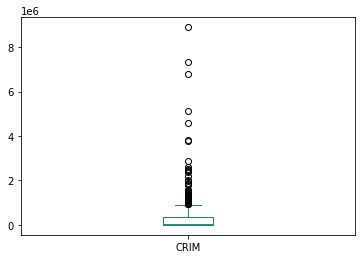

In [34]:
train_crimenes.plot(kind='box')

Analizaré los datos de la división correspondiente al TEST

In [37]:
print(test)

       CRIM    ZN  INDUS  CHAS   NOX     RM   AGE    DIS  RAD   TAX  PTRATIO  \
46    18836     0   6910     0  4480  57860  3330  51004    3  2330     1790   
127   25915     0  21890     0  6240  56930  9600  17883    4  4370     2120   
79     8387     0  12830     0  4370  58740  3660  45026    5  3980     1870   
317   24522     0   9900     0  5440  57820  7170  40317    4  3040     1840   
97    12083     0   2890     0  4450  80690  7600  34952    2  2760     1800   
..      ...   ...    ...   ...   ...    ...   ...    ...  ...   ...      ...   
2      2729     0   7070     0  4690  71850  6110  49671    2  2420     1780   
372  826725     0  18100     1  6680  58750  8960  11296   24  6660     2020   
313   26938     0   9900     0  5440  62660  8280  32628    4  3040     1840   
213   14052     0  10590     0  4890  63750  3230  39454    4  2770     1860   
269    9065  2000   6960     1  4640  59200  6150  39175    3  2230     1860   

         B  LSTAT  MEDV  
46   39690   

In [39]:
test.shape

(152, 14)

In [38]:
test.describe

<bound method NDFrame.describe of        CRIM    ZN  INDUS  CHAS   NOX     RM   AGE    DIS  RAD   TAX  PTRATIO  \
46    18836     0   6910     0  4480  57860  3330  51004    3  2330     1790   
127   25915     0  21890     0  6240  56930  9600  17883    4  4370     2120   
79     8387     0  12830     0  4370  58740  3660  45026    5  3980     1870   
317   24522     0   9900     0  5440  57820  7170  40317    4  3040     1840   
97    12083     0   2890     0  4450  80690  7600  34952    2  2760     1800   
..      ...   ...    ...   ...   ...    ...   ...    ...  ...   ...      ...   
2      2729     0   7070     0  4690  71850  6110  49671    2  2420     1780   
372  826725     0  18100     1  6680  58750  8960  11296   24  6660     2020   
313   26938     0   9900     0  5440  62660  8280  32628    4  3040     1840   
213   14052     0  10590     0  4890  63750  3230  39454    4  2770     1860   
269    9065  2000   6960     1  4640  59200  6150  39175    3  2230     1860   

     

In [40]:
test_crimenes = train['CRIM']
test_crimenes

386    2439380
436    1442080
89        5302
361     383684
11       11747
        ...   
233      33147
463     582115
32      138799
42       14150
175       6664
Name: CRIM, Length: 354, dtype: int64

In [41]:
test_grafico = train['CRIM'].mean
test_grafico

<bound method NDFrame._add_numeric_operations.<locals>.mean of 386    2439380
436    1442080
89        5302
361     383684
11       11747
        ...   
233      33147
463     582115
32      138799
42       14150
175       6664
Name: CRIM, Length: 354, dtype: int64>

<AxesSubplot:>

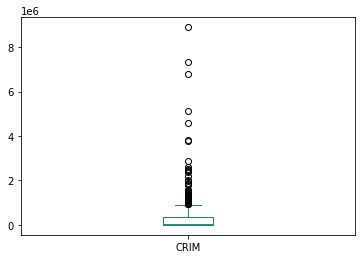

In [43]:
test_crimenes.plot(kind = 'box')

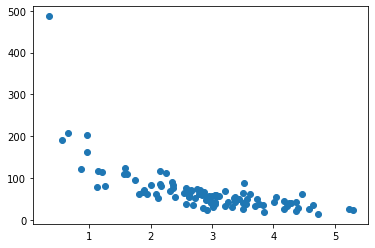

In [1]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=1000)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(670, 2) (330, 2) (670,) (330,)
